## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from sklearn.metrics import balanced_accuracy_score, precision_score
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

import pandas as pd
import matplotlib.pyplot as plt

## Reading Dataset

In [2]:
df = pd.read_csv('main.csv')
df.head()

,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,prev_relocate,intake_type,intake_condition,animal_type_in,sex_upon_intake,age_upon_intake,breed,color,is_named_in,year_in,month_in,day_in,outcome_type
0,0,0,2,0,0,0,0,Stray,Normal,Dog,Neutered Male,1.0,mix spinone italiano,yellow white,1,2017,12,Thursday,Return to Owner
1,0,0,1,0,0,0,0,Public Assist,Normal,Dog,Neutered Male,7.0,mix spinone italiano,yellow white,1,2014,12,Friday,Return to Owner
2,0,0,0,0,0,0,0,Public Assist,Normal,Dog,Neutered Male,6.0,mix spinone italiano,yellow white,1,2014,3,Friday,Return to Owner
3,0,0,0,0,0,0,0,Owner Surrender,Normal,Dog,Neutered Male,1.0,dachshund,tricolor,1,2014,4,Wednesday,Transfer
4,0,0,0,0,0,0,0,Public Assist,Injured,Dog,Neutered Male,1.0,sheepdog shetland,brown white,1,2013,11,Saturday,Return to Owner


## Encoding Categorical Data

In [3]:
LE = LabelEncoder()
for col in df.columns[1:]:
    if df[col].dtype == 'object':
        try:
            df[col] = LE.fit_transform(df[col])
        except:
            print(col)

## Setting X and y

In [25]:
y = df['outcome_type']
X = df.drop(['outcome_type'], axis = 1)
X

,prev_adoption,prev_transfer,prev_ret_to_owner,prev_rto_adopt,prev_disposal,prev_missing,prev_relocate,intake_type,intake_condition,animal_type_in,sex_upon_intake,age_upon_intake,breed,color,is_named_in,year_in,month_in,day_in
0,0,0,2,0,0,0,0,4,5,2,2,1.000,1435,373,1,2017,12,4
1,0,0,1,0,0,0,0,3,5,2,2,7.000,1435,373,1,2014,12,0
2,0,0,0,0,0,0,0,3,5,2,2,6.000,1435,373,1,2014,3,0
3,0,0,0,0,0,0,0,2,5,2,2,1.000,638,335,1,2014,4,6
4,0,0,0,0,0,0,0,3,3,2,2,1.000,1771,91,1,2013,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127907,0,0,0,0,0,0,0,2,5,2,0,0.083,1391,87,1,2021,8,0
127908,0,0,0,0,0,0,0,2,5,2,0,0.083,1391,87,1,2021,8,0
127909,0,0,0,0,0,0,0,5,5,4,4,2.000,163,87,0,2021,8,0
127910,0,0,0,0,0,0,0,5,5,4,4,2.000,163,87,0,2021,8,0


## Train-Test Split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.30, random_state=43, stratify=y)

## Scaling Data

In [6]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
X.shape

(127912, 18)

## CNN Model

In [8]:
model = Sequential()
model.add(Dense(activation = "relu", input_dim = 18, units = 64))
model.add(Dropout(rate=0.2))
model.add(Dense(activation = "relu", units = 128))
model.add(Dropout(rate=0.4))
model.add(Dense(activation = "softmax", units = 25))
model.add(Dense(activation = "softmax", units = 9))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1216      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3225      
_________________________________________________________________
dense_3 (Dense)              (None, 9)                 234       
Total params: 12,995
Trainable params: 12,995
Non-trainable params: 0
____________________________________________________

### Compile Model 

In [10]:
model.compile(optimizer = 'adam' ,  loss='sparse_categorical_crossentropy', metrics=['acc'] )

### Fitting CNN Model with early stopping

In [11]:
early_stop = EarlyStopping(patience=5)

In [13]:
history= model.fit(X_train, y_train,validation_data=(X_test, y_test), epochs=20, batch_size=64, callbacks=[early_stop]);

Epoch 1/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.8884 - acc: 0.6505 - val_loss: 0.8871 - val_acc: 0.6490
Epoch 2/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.8872 - acc: 0.6499 - val_loss: 0.8893 - val_acc: 0.6463
Epoch 3/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.8870 - acc: 0.6500 - val_loss: 0.8862 - val_acc: 0.6483
Epoch 4/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.8859 - acc: 0.6510 - val_loss: 0.8868 - val_acc: 0.6469
Epoch 5/20
1400/1400 [==============================] - 3s 2ms/step - loss: 0.8865 - acc: 0.6507 - val_loss: 0.8834 - val_acc: 0.6495
Epoch 6/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.8853 - acc: 0.6507 - val_loss: 0.8834 - val_acc: 0.6487
Epoch 7/20
1400/1400 [==============================] - 2s 2ms/step - loss: 0.8840 - acc: 0.6510 - val_loss: 0.8816 - val_acc: 0.6498
Epoch 8/20
1400/1400 [==============================] - 3s 2ms

### Visualization - Model's Performance

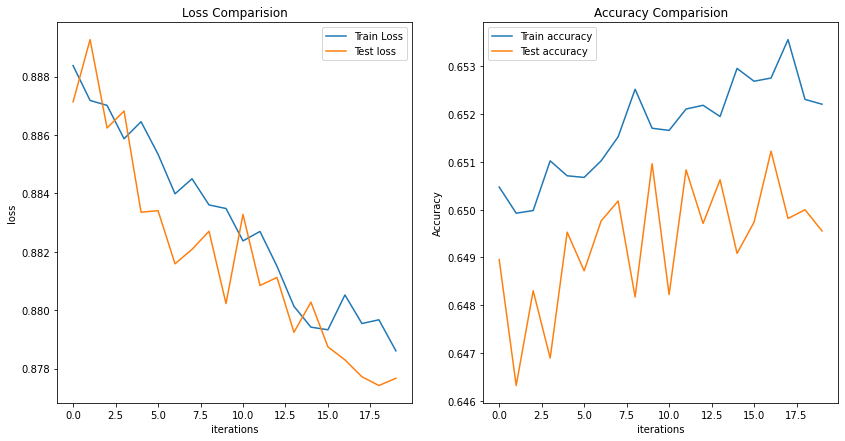

In [14]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test loss')
plt.xlabel('iterations') 
plt.ylabel('loss') 
plt.title("Loss Comparision")
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='Train accuracy')
plt.plot(history.history['val_acc'], label='Test accuracy')
plt.xlabel('iterations') 
plt.ylabel('Accuracy') 
plt.title("Accuracy Comparision")
plt.legend();

In [17]:
model.save("model.h5")

### Model Evaluation

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size=9)
print("Loss : ", loss)
print("accuracy : ", accuracy)

4264/4264 [==============================] - 3s 684us/step - loss: 0.8777 - acc: 0.6496
Loss :  0.8776691555976868
accuracy :  0.6495543718338013


## AdaBoost Classifier

In [19]:
ab = AdaBoostClassifier(n_estimators=100, random_state=0)
ab.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

### Predicting values

In [20]:
y_pred_0 = ab.predict(X_train)
y_pred_1 = ab.predict(X_test)

In [21]:
print("\nTrain data")
print("Accuracy score   :",accuracy_score(y_train, y_pred_0))
print("Balanced Accuracy:",balanced_accuracy_score(y_train, y_pred_0))
print("precision score  :",precision_score(y_train, y_pred_0, average='weighted'))
print("Recall score     :",recall_score(y_train, y_pred_0, average='weighted'))

print("\nTest data")
print("Accuracy score   :",accuracy_score(y_test, y_pred_1))
print("Balanced Accuracy:",balanced_accuracy_score(y_test, y_pred_1))
print("precision score  :",precision_score(y_test, y_pred_1, average='weighted'))
print("Recall score     :",recall_score(y_test, y_pred_1, average='weighted'))


Train data
Accuracy score   : 0.30478679443364826
Balanced Accuracy: 0.17428353626914986
precision score  : 0.37495807567391914
Recall score     : 0.30478679443364826

Test data
Accuracy score   : 0.30601448897691147
Balanced Accuracy: 0.16001369625757533
precision score  : 0.3740361478003704
Recall score     : 0.30601448897691147


## Random Forest Classifier

In [22]:
rf = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

### Predicting values

In [23]:
y_pred_0 = rf.predict(X_train)
y_pred_1 = rf.predict(X_test)

### Model Evaluation

In [24]:
print("\nTrain data")
print("Accuracy score   :",accuracy_score(y_train, y_pred_0))
print("Balanced Accuracy:",balanced_accuracy_score(y_train, y_pred_0))
print("precision score  :",precision_score(y_train, y_pred_0, average='weighted'))
print("Recall score     :",recall_score(y_train, y_pred_0, average='weighted'))

print("\nTest data")
print("Accuracy score   :",accuracy_score(y_test, y_pred_1))
print("Balanced Accuracy:",balanced_accuracy_score(y_test, y_pred_1))
print("precision score  :",precision_score(y_test, y_pred_1, average='weighted'))
print("Recall score     :",recall_score(y_test, y_pred_1, average='weighted'))


Train data
Accuracy score   : 0.9880497665795528
Balanced Accuracy: 0.9404276318302496
precision score  : 0.9880038042287124
Recall score     : 0.9880497665795528

Test data
Accuracy score   : 0.6637306509615886
Balanced Accuracy: 0.32220220183854065
precision score  : 0.6612037993031961
Recall score     : 0.6637306509615886
